In [1]:
import os
import numpy as np
import nibabel as nib
from nibabel.testing import data_path
img = nib.load("ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii")
header = img.header
#print(header)
print(header.get_data_shape())
print(header.get_data_dtype())
print(header.get_zooms())

(256, 256, 166)
>f4
(0.9475275, 0.944205, 1.2023071)


[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          3.78223348 14.64427185 16.00959587
 11.41177273 22.92079163 25.92815208 20.72074509 24.06595993 10.59963512
 22.60488

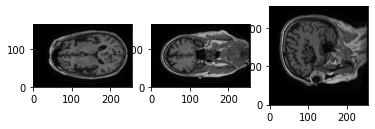

In [2]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
img = nib.load("ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii")
img_data = img.get_fdata()
#print(img_data.shape)

def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        
slice_0 = img_data[100, :, :]
slice_1 = img_data[:, 100, :]
slice_2 = img_data[:, :, 50]
print(slice_0[32])


show_slices([slice_0, slice_1, slice_2])
#plt.suptitle("Center slices for EPI image") 

In [3]:
import numpy as np
import nibabel as nib
import pandas as pd
import scikitplot as skplt

listofColumns = []
listofIDs = []
listofBrainData = []
listofBrainTypes = []

K_Means_Divisions = 5

Data_Brains = pd.read_csv("TestDatasheet.csv")
listofColumns = Data_Brains.columns
for i in range(len(Data_Brains)):
    Subject = Data_Brains.loc[i]["Subject"]
    Group = Data_Brains.loc[i]["Group"]
    Acq_Date = Data_Brains.loc[i]["Acq Date"]
    List_Acq_Date = list(Acq_Date)
    for j in range(len(List_Acq_Date)):
        if(List_Acq_Date[j] == '/'):
            List_Acq_Date[j] = '_'
    Acq_Date = "".join(List_Acq_Date)
    File_Path = (Subject + "-" + Group + "-" + Acq_Date + ".nii")
    print(File_Path)
    File_root= ".\Test_dataset"
    file = os.path.join(File_root,File_Path)
    img = nib.load(file)
    img_data = img.get_fdata()
    listofIDs.append(i)
    listofBrainData.append(img_data)
    if(Group == "CN"):
        listofBrainTypes.append(0)
    elif(Group == "EMCI"):
        listofBrainTypes.append(1)
    elif(Group == "LMCI"):
        listofBrainTypes.append(2)
    else:
        print("Error Subject Identified as: " + Group)
X_T = []# dividing up the input data
Y_T = []# dividing up the answers
Y_P = []# the predicted value of each model
Predict = []# the predicted values of all the models
for i in range(K_Means_Divisions):
    X_T.append([])
    Y_T.append([])
    
#Ah Yes I do love a bit of code
for i in range(K_Means_Divisions):
    lower = int((len(listofBrainData)*i)/K_Means_Divisions)
    upper = int((len(listofBrainData)*(i+1))/K_Means_Divisions)
    for j in range(lower, upper):
        X_T[i].append(listofBrainData[j])
for i in range(K_Means_Divisions):
    train_X = X_T.copy()
    train_Y = Y_T.copy()
    train_X.pop(i)
    train_Y.pop(i)
    Y_P = [0,1]#model(train_X,train_Y,X_T[i])
    Predict += Y_P
        
listofBrainTypes
Predict
#confusion matrix
skplt.metrics.confusion_matrix(Predict, listofBrainTypes)
skplt.metrics.plot_confusion_matrix(
    Predict,
    listofBrainTypes,
    normalize = False
)
skplt.metrics.plot_confusion_matrix(
    Predict,
    listofBrainTypes,
    normalize = True
)

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
import nibabel as nib
import pandas as pd
import scikitplot as skplt
import os
from sklearn.neural_network import MLPClassifier

listofColumns = []
listofIDs = []
listofBrainData = []
listofBrainTypes = []
listofLMCI = []
listofEMCI = []
listofCN = []

K_Means_Divisions = 5
CN = 0
EMCI = 1
LMCI = 2

listofLMCI = os.listdir(".\DataSet\LMCI")
listofEMCI = os.listdir(".\DataSet\EMCI")
listofCN = os.listdir(".\DataSet\CN")


def DLmodel(train_X,train_Y,test_X):
    model = MLPClassifier(solver='sgd', alpha = 0.0001, hidden_layer_sizes=(70,70,70), activation = 'tanh', learning_rate = 'invscaling')
    trained_model = model.fit(train_X, train_Y)
    predict = trained_model.predict(test_X)
    print(predict)


for i in range(len(listofCN)):
    #CN
    file = os.path.join(".\DataSet\CN",listofCN[i])
    img = nib.load(file)
    img_data = img.get_fdata()
    listofBrainData.append(img_data)
    listofBrainTypes.append(CN)
    #EMCI
    file = os.path.join(".\DataSet\EMCI",listofEMCI[i])
    img = nib.load(file)
    img_data = img.get_fdata()
    listofBrainData.append(img_data)
    listofBrainTypes.append(EMCI)
    #LMCI
    file = os.path.join(".\DataSet\LMCI",listofLMCI[i])
    img = nib.load(file)
    img_data = img.get_fdata()
    listofBrainData.append(img_data)
    listofBrainTypes.append(LMCI)
    

X_T = []# dividing up the input data
Y_T = []# dividing up the answers
Y_P = []# the predicted value of each model
Predict = []# the predicted values of all the models
for i in range(K_Means_Divisions):
    X_T.append([])
    Y_T.append([])
    
for i in range(K_Means_Divisions):
    lower = int((len(listofBrainData)*i)/K_Means_Divisions)
    upper = int((len(listofBrainData)*(i+1))/K_Means_Divisions)
    for j in range(lower, upper):
        X_T[i].append(listofBrainData[j])
for i in range(K_Means_Divisions):
    train_X = X_T.copy()
    train_Y = Y_T.copy()
    train_X.pop(i)
    train_Y.pop(i)
    #DLmodel(train_X,train_Y,X_T[i])
    Y_P = [0,1,2,0,1,2]#model(train_X,train_Y,X_T[i])
    
    Predict += Y_P

#confusion matrix
#skplt.metrics.confusion_matrix(Predict, listofBrainTypes)
#skplt.metrics.plot_confusion_matrix(
#    Predict,
#    listofBrainTypes,
#    normalize = False
#)
#skplt.metrics.plot_confusion_matrix(
#    Predict,
#    listofBrainTypes,
#    normalize = True
#)

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


Start_Slice = 30
Mid_Slice = 110
End_Slice = 190
Step_Slice = 5

Brain_Data = []
Brains = []
Brain_Types = [0,1,2,0,1,2]
 

img = nib.load("ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii")
img_data = img.get_fdata()
for i in range(Start_Slice,Mid_Slice,Step_Slice):
    for j in range(len(img_data[i, :, :])):
        for k in range(len(img_data[i, :, :][j])):
            Brain_Data.append(img_data[i, :, :][j][k])


Brains.append(Brain_Data)
Brains.append(Brain_Data)
Brains.append(Brain_Data)
Brains.append(Brain_Data)
Brains.append(Brain_Data)
Brains.append(Brain_Data)
print("Here")
X_train, X_test, y_train, y_test = train_test_split(Brains, Brain_Types, test_size=0.16)
model = MLPClassifier(solver='sgd', alpha = 0.0001, hidden_layer_sizes=(70,70,70), activation = 'tanh', learning_rate = 'invscaling')
trained_model = model.fit(X_train, y_train)
predict = trained_model.predict(X_test)
print(predict)
print(y_test)

In [ ]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import nibabel as nb
from deepbrain import Extractor
import scikitplot as skplt
Brain_Size = 1400000
CN = 0
EMCI = 1
LMCI = 2

Brain_Data = []
Brain_Data_reduced = []
Brains = []
Brain_Types = []
listofLMCI = []
listofEMCI = []
listofCN = []
 
def Reduce_Brain(img):
    print("Reducing a brain")
    Brain_Data_Small = []
    prob = ext.run(img) 
    mask = prob > 0.5
    for i in range (len(mask)):
        for j in range(len(mask[i])):
            for k in range(len(mask[i][j])):
                if mask[i][j][k]:
                    Brain_Data_Small.append(img[i][j][k])
    print(type(Brain_Data_Small[0]))
    while(len(Brain_Data_Small) < Brain_Size):
        if(len(Brain_Data_Small) % 2 == 0):
            Brain_Data_Small.append(0)
        else:
            Brain_Data_Small.insert(0,0)
    print("the brain is: ",len(Brain_Data_Small))
    return Brain_Data_Small

listofLMCI = os.listdir(".\DataSet\LMCI")
listofEMCI = os.listdir(".\DataSet\EMCI")
listofCN = os.listdir(".\DataSet\CN")
print("start")
ext = Extractor()
print("End")

for i in range(len(listofCN)):
    print("collecting 3 brains")
    #CN
    print(len(Brains))
    print(len(Brain_Types))
    file = os.path.join(".\DataSet\CN",listofCN[i])
    img = nib.load(file).get_fdata()
    Brain_Data_reduced = Reduce_Brain(img)
    Brains.append(Brain_Data_reduced)
    Brain_Types.append(CN)
    #EMCI
    file = os.path.join(".\DataSet\EMCI",listofEMCI[i])
    img = nib.load(file).get_fdata()
    Brain_Data_reduced = Reduce_Brain(img)
    Brains.append(Brain_Data_reduced)
    Brain_Types.append(EMCI)
    #LMCI
    file = os.path.join(".\DataSet\LMCI",listofLMCI[i])
    img = nib.load(file).get_fdata()
    Brain_Data_reduced = Reduce_Brain(img)
    Brains.append(Brain_Data_reduced)
    Brain_Types.append(LMCI)
print(len(Brains))
print(len(Brain_Types))
print(len(Brains[0]))
print(Brain_Types[0])
X_train, X_test, y_train, y_test = train_test_split(Brains, Brain_Types, test_size=0.33)
model = MLPClassifier(solver='sgd', alpha = 0.0001, hidden_layer_sizes=(70,70,70), activation = 'tanh', learning_rate = 'invscaling')

trained_model = model.fit(X_train, y_train)
predict = trained_model.predict(X_test)
print(predict)
print(y_test)
print(len(predict))
print(len(y_test))
f= open("Data.txt","w+")
for i in range(len(predict)):
    f.write("Prediction: ",predict[i])
    f.write("Acctual: ",y_test[i])
f.close() 

In [ ]:
import nibabel as nib
from deepbrain import Extractor
Data_small = []
# Load a nifti as 3d numpy image [H, W, D]
img = nib.load("ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii").get_fdata()

ext = Extractor()

# `prob` will be a 3d numpy image containing probability 
# of being brain tissue for each of the voxels in `img`
prob = ext.run(img) 
# mask can be obtained as:
mask = prob > 0.5
for i in range (len(mask)):
    for j in range(len(mask[i])):
        for k in range(len(mask[i][j])):
            if mask[i][j][k]:
                Data_small.append(img[i][j][k])
                
print(len(Data_small))
print(len(img))
print(len(img[0]))
print(len(img[0][0]))

In [ ]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from deepbrain import Extractor
import scikitplot as skplt
Brain_Size = 1000000
CN = 0
EMCI = 1
LMCI = 2

Brain_Data = []
Brain_Data_reduced = []
Brains = []
Brain_Types = []
listofLMCI = []
listofEMCI = []
listofCN = []
 
def Reduce_Brain(img):
    print("Brain Reduction Start")
    Brain_Data_Small = []
    prob = ext.run(img) 
    mask = prob > 0.5
    for i in range (len(mask)):
        for j in range(len(mask[i])):
            for k in range(len(mask[i][j])):
                if mask[i][j][k]:
                    Brain_Data_Small.append(img[i][j][k])
    print("Brain size pre processed", len(Brain_Data_Small))
    if(len(Brain_Data_Small) != Brain_Size):
        difrence = len(Brain_Data_Small) - Brain_Size
        if(difrence < 0):
            amount = (difrence*-1)/2
            amount = int(round(amount))
            print("Diffrence needed", amount*2)
            for i in range(amount):
                Brain_Data_Small.insert(0, 0)
                Brain_Data_Small.append(0)
        if(difrence > 0):
            amount = difrence/2
            amount = int(round(amount))
            print("Diffrence needed", amount*2)
            for i in range(amount):
                Brain_Data_Small.pop(0)
                Brain_Data_Small.pop(len(Brain_Data_Small)-1)
    if(len(Brain_Data_Small) > Brain_Size):
        Brain_Data_Small.pop(0)
    if(len(Brain_Data_Small) < Brain_Size):
        Brain_Data_Small.append(0)
    print("Brain size post processed",len(Brain_Data_Small))
    print("Brain Reduction End")
    return Brain_Data_Small

listofLMCI = os.listdir(".\DataSet\LMCI")
listofEMCI = os.listdir(".\DataSet\EMCI")
listofCN = os.listdir(".\DataSet\CN")
print("Start brain extraction model")
ext = Extractor()
print("End brain extraction model")

for i in range(len(listofCN)):
    #CN
    file = os.path.join(".\DataSet\CN",listofCN[i])
    img = nib.load(file).get_fdata()
    Brain_Data_reduced = Reduce_Brain(img)
    filename = "./CN/CN_Number "+ str(i) +".txt"
    print(filename)
    f= open(filename,"w+")
    for j in range(len(Brain_Data_reduced)):
        f.write("%d\n" % Brain_Data_reduced[j])
    f.close()
    #EMCI
    file = os.path.join(".\DataSet\EMCI",listofEMCI[i])
    img = nib.load(file).get_fdata()
    Brain_Data_reduced = Reduce_Brain(img)
    filename = "./EMCI/EMCI_Number "+ str(i) +".txt"
    print(filename)
    f= open(filename,"w+")
    for j in range(len(Brain_Data_reduced)):
        f.write("%d\n" % Brain_Data_reduced[j])
    f.close()
    #LMCI
    file = os.path.join(".\DataSet\LMCI",listofLMCI[i])
    img = nib.load(file).get_fdata()
    Brain_Data_reduced = Reduce_Brain(img)
    filename = "./LMCI/LMCI_Number "+ str(i) +".txt"
    print(filename)
    f= open(filename,"w+")
    for j in range(len(Brain_Data_reduced)):
        f.write("%d\n" % Brain_Data_reduced[j])
    f.close()

print("Done")

In [ ]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import nibabel as nb
from deepbrain import Extractor
import scikitplot as skplt
import time
Brain_Size = 1400000
CN = 0
EMCI = 1
LMCI = 2

Brain_Data = []
Brains = []
Brain_Types = []
listofLMCI = []
listofEMCI = []
listofCN = []

listofLMCI = os.listdir("./LMCI")
listofEMCI = os.listdir("./EMCI")
listofCN = os.listdir("./CN")

_min = 10000
_max = 0

for i in range(len(listofCN)):
    print(len(Brains))
    print(len(Brain_Types))
    file = os.path.join("./CN",listofCN[i])
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            temp = int(line.strip())
            if temp > _max:
                _max = temp
            elif temp < _min:
                _min = temp             
    print(_max)
    print(_min)
    #Brains.append(contents)
    #EMCI
    file = os.path.join("./EMCI",listofEMCI[i])
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            temp = int(line.strip())
            if temp > _max:
                _max = temp
            elif temp < _min:
                _min = temp             
    print(_max)
    print(_min)
    #LMCI
    file = os.path.join("./LMCI",listofLMCI[i])
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            temp = int(line.strip())
            if temp > _max:
                _max = temp
            elif temp < _min:
                _min = temp             
    print(_max)
    print(_min)



In [ ]:
#A = min data B = max data a = min after b = max after x = data to normalize
#a + (x-A)*(b-a)/(B-A)
import os
A = 0
B = 5643
a = 0
b = 1


Brain_Data = []
listofLMCI = []
listofEMCI = []
listofCN = []

listofLMCI = os.listdir("./LMCI")
listofEMCI = os.listdir("./EMCI")
listofCN = os.listdir("./CN")

for i in range(len(listofCN)):
    print(i)
    Brain_Data = []
    #cn
    file = os.path.join("./CN",listofCN[i])
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            x = int(line.strip())
            toadd = a + (x-A)*(b-a)/(B-A)
            Brain_Data.append(toadd)
    with open(file, 'w') as f:
        for item in Brain_Data:
            f.write("%s\n" % item)
    #emci
    Brain_Data = []
    file = os.path.join("./EMCI",listofEMCI[i])
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            x = int(line.strip())
            toadd = a + (x-A)*(b-a)/(B-A)
            Brain_Data.append(toadd)
    with open(file, 'w') as f:
        for item in Brain_Data:
            f.write("%s\n" % item)
    #lmci
    Brain_Data = []
    file = os.path.join("./LMCI",listofLMCI[i])
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            x = int(line.strip())
            toadd = a + (x-A)*(b-a)/(B-A)
            Brain_Data.append(toadd)
    with open(file, 'w') as f:
        for item in Brain_Data:
            f.write("%s\n" % item)

In [8]:
import os
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

Brains = []
Brain_Types = []
Brain_Data = []
listofLMCI = []
listofEMCI = []
listofCN = []

listofLMCI = os.listdir("./LMCI")
listofEMCI = os.listdir("./EMCI")
listofCN = os.listdir("./CN")
CN = 0
EMCI = 1
LMCI = 2

for i in range(len(listofCN)):
    print(i)
    Brain_Data = []
    #cn
    file = os.path.join("./CN",listofCN[i])
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            x = line.strip()
            Brain_Data.append(x)
    Brains.append(Brain_Data)
    Brain_Types.append(CN)

    #emci
    Brain_Data = []
    file = os.path.join("./EMCI",listofEMCI[i])
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            x = line.strip()
            Brain_Data.append(x)
    Brains.append(Brain_Data)
    Brain_Types.append(EMCI)
    #lmci
    Brain_Data = []
    file = os.path.join("./LMCI",listofLMCI[i])
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            x = line.strip()
            Brain_Data.append(x)
    Brains.append(Brain_Data)
    Brain_Types.append(LMCI)
print("ahh damn it")   
for i in range len(Brains):
    if(i < (len(Brains)/100 * 70))

ahh damn it


ValueError: With n_samples=0, test_size=0.33 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.model_selection import train_test_split
print("Start")
Brains = []
Brain_Types = []
Brain_Data = []
listofLMCI = []
listofEMCI = []
listofCN = []

listofLMCI = os.listdir("./LMCI")
listofEMCI = os.listdir("./EMCI")
listofCN = os.listdir("./CN")
CN = 0
EMCI = 1
LMCI = 2

def create_dataset(xs, ys, n_classes):
    print("Creating a dataset")
    ys = tf.one_hot(ys, depth=n_classes)
    return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .batch(128)

for i in range(len(listofCN)):
    print(i)
    Brain_Data = []
    #cn
    file = os.path.join("./CN",listofCN[i])
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            x = float(line.strip())
            Brain_Data.append(x)
    Brains.append(Brain_Data)
    Brain_Types.append(CN)

    #emci
    Brain_Data = []
    file = os.path.join("./EMCI",listofEMCI[i])
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            x = float(line.strip())
            Brain_Data.append(x)
    Brains.append(Brain_Data)
    Brain_Types.append(EMCI)
    #lmci
    Brain_Data = []
    file = os.path.join("./LMCI",listofLMCI[i])
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            x = float(line.strip())
            Brain_Data.append(x)
    Brains.append(Brain_Data)
    Brain_Types.append(LMCI)
    
#create_dataset(Brains, Brain_Types, 3)

x_train, x_test, y_train, y_test = train_test_split(Brains, Brain_Types, test_size=0.16)

train_dataset = create_dataset(x_train, y_train,3)
val_dataset = create_dataset(x_test, y_test,3)

model = keras.Sequential([
    keras.layers.Reshape(target_shape=(1000000,), input_shape=(1000000)),
    keras.layers.Dense(units=22*27*27, activation='relu'),BatchNormalization(),
    keras.layers.Dense(units=10*13*10, activation='relu'),
    keras.layers.Dense(units=10*13*10, activation='relu'),BatchNormalization(),
    keras.layers.Dense(units=4*6*4, activation='relu'),
    keras.layers.Dense(units=3, activation='softmax')
])
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=val_dataset.repeat(), 
    validation_steps=2
)


Start
0
1
2
Creating a dataset
Creating a dataset


TypeError: 'int' object is not iterable